In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np

from glob import glob

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Node membership clustergram

In [4]:
networks_dir = "C:/Users/Owner/Desktop/Ken_Analysis/results/CxPd111517/forest/"

files = glob(networks_dir+"/*nodes.tsv")

In [5]:
dfs = []
mapper = {"steiner": 1, "TF": 2, "terminal": 3}
num_top = 400
#terminals degree
#steiner degree
#combined degree
#number of terminals
#number of steiner nodes
#network size
#sums = []
#print(files)
for file in files: 
    #print(file)
    tag = file.split('/')[-1].rstrip(".nodes.tsv")
    
    df = pd.read_csv(file, sep='\t')
    #print(df)
    #df = df.sort_values(by ="robustness", ascending = False).head(num_top)
    df[tag] = df["prize"].apply(lambda x: 1 if x == 0 else 3)
    #steiner_sum = df[df[tag] == 1]["degree"].mean()
    #terminal_sum = df[df[tag] == 3]["degree"].mean()
    #sums.append((steiner_sum, terminal_sum))
    #print(df)
    df = df[["protein", tag]].set_index("protein")
    
    dfs.append(df)
    
merged = pd.concat(dfs, axis=1).fillna(0)
#print(sums)

In [8]:
merged

,forest\w_0.5_b_1_g_1000,forest\w_0.5_b_1_g_10000,forest\w_0.5_b_1_g_100000,forest\w_0.5_b_1_g_25000,forest\w_0.5_b_1_g_5000,forest\w_0.5_b_1_g_60000,forest\w_0.5_b_2_g_1000,forest\w_0.5_b_2_g_10000,forest\w_0.5_b_2_g_100000,forest\w_0.5_b_2_g_25000,...,forest\w_3_b_2_g_100000,forest\w_3_b_2_g_25000,forest\w_3_b_2_g_5000,forest\w_3_b_2_g_60000,forest\w_3_b_3_g_1000,forest\w_3_b_3_g_10000,forest\w_3_b_3_g_100000,forest\w_3_b_3_g_25000,forest\w_3_b_3_g_5000,forest\w_3_b_3_g_60000
A1BG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
A1CF,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
A2M,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
AACS,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
AAGAB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
AAK1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
AANAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
AAR2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
AARS,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
AASDHPPT,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


C:\Users\Owner\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


RecursionError: maximum recursion depth exceeded while getting the str of an object

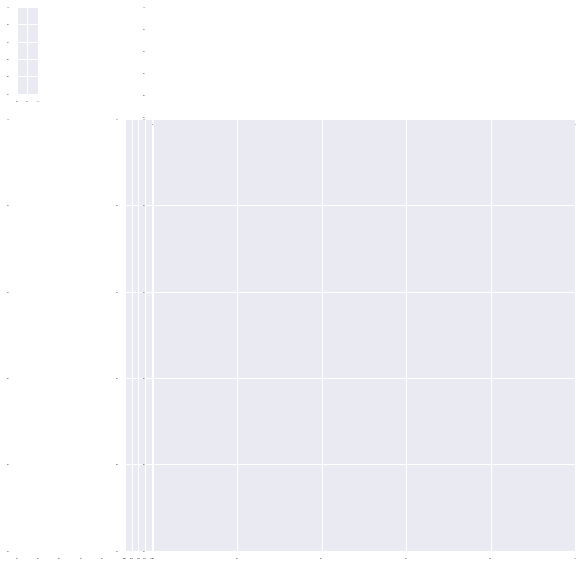

In [6]:
sns.set(font_scale=0.2)
plt.figure(figsize = (20,8))
# steiner: blue, TF: green, terminal: red
palette = sns.color_palette("pastel")
row_colors = merged.max(axis=1).map({i:palette[i-1] for i in range(len(palette))})

cm = sns.clustermap(merged>0, row_colors=row_colors, cmap=sns.cubehelix_palette(dark=0, light=1, hue=0, as_cmap=True))

hm = cm.ax_heatmap.get_position()
plt.setp(cm.ax_heatmap.xaxis.get_majorticklabels(), fontsize=8)
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), fontsize=3)
cm.ax_heatmap.set_position([hm.x0, hm.y0, hm.width, hm.height])
col = cm.ax_col_dendrogram.get_position()
cm.ax_col_dendrogram.set_position([col.x0, col.y0, col.width, col.height*0.5])

cm.savefig('param_node_membership.pdf')

In [7]:
#terminals degree
#steiner degree
#combined degree
#number of terminals
#number of steiner nodes
#network size
#difference beteen steiner and degree
#coherency of network

degree_dist = pd.DataFrame(columns=["degree_term", "degree_steiner", "degree_combined",
                                    "median_term", "median_steiner", "median_combine",
                                    "num_terminal", "num_steiner", "num_combined",
                                   "degree_steiner_term_diff", "coherency"])

#print(files)
for file in files: 
    #print(file)
    tag = file.split('/')[-1].rstrip(".nodes.tsv")
    
    df = pd.read_csv(file, sep='\t')
    #df = df.sort_values(by ="robustness", ascending = False).head(num_top)
    df[tag] = df["prize"].apply(lambda x: 1 if x == 0 else 3)
    #print(df)
    steiner = df[df[tag] == 1]["degree"]
    terminal = df[df[tag] == 3]["degree"]
    steiner_size = steiner.size
    terminal_size = terminal.size
    steiner_mean = steiner.mean()
    terminal_mean = terminal.mean()
    combined_size = num_top
    combined_mean = df["degree"].mean()
    ranking = terminal_mean - steiner_mean
    terminal_median = terminal.median()
    steiner_median = steiner.median()
    combined_median = df["degree"].median()
    if steiner_size != 0:
        coherency = terminal_size/steiner_size
    else:
        coherency = 0
    
    degree_dist.loc[tag] = [terminal_mean, steiner_mean, combined_mean,
                            terminal_median, steiner_median, combined_median,
                            terminal_size, steiner_size, combined_size,
                           ranking, coherency]
    
degree_dist = degree_dist.sort_values(by = "degree_steiner_term_diff", ascending = False)
print(degree_dist)
degree_dist.to_csv("results.csv", sep = ",")

                           degree_term  degree_steiner  degree_combined  \
forest\w_1_b_1_g_100000     110.208178       33.715311        36.180163   
forest\w_3_b_2_g_100000     107.252708       31.099605        33.284649   
forest\w_3_b_3_g_100000     106.655914       30.593160        32.743262   
forest\w_1_b_1_g_60000      109.198529       33.536166        35.915376   
forest\w_3_b_3_g_60000      106.496429       31.591954        33.799200   
forest\w_3_b_2_g_60000      106.870968       32.228127        34.473690   
forest\w_1_b_3_g_60000      106.120996       31.568913        33.792104   
forest\w_1_b_2_g_100000     106.491039       31.947230        34.254243   
forest\w_1_b_3_g_100000     105.907473       31.621442        33.897819   
forest\w_1_b_2_g_60000      106.120996       31.999109        34.249109   
forest\w_1_b_1_g_25000      109.349265       36.450358        38.942315   
forest\w_1_b_3_g_25000      105.914894       34.131246        36.472017   
forest\w_3_b_2_g_25000   

In [ ]:
#some experiments - vary the parameters individually
#see how much specificity filtering actually helps
#see how much adding noise affects
#picking top x hundred parameters
#other heuristics - checking against known datasets
